In [ ]:
pip install pandas

In [ ]:
pip install nfl_data_py

In [ ]:
pip install matplotlib

In [149]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import os
import urllib.request
import random

In [150]:
year = 2023

In [151]:
pbp = nfl.import_pbp_data([year])

2023 done.
Downcasting floats.


In [152]:
pbp.shape

(21573, 384)

In [153]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,None,None,NaN,None,NaN,48000;52641;54721;56098;53639;53448;55912;4510...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11,11
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11,11
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",4.0,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,I_FORM,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",NaN,49410;41475;52516;47812;53445;46629;41349;5348...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11


In [154]:
pbp.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_formation', 'offense_personnel', 'defenders_in_box',
       'defense_personnel', 'number_of_pass_rushers', 'players_on_play',
       'offense_players', 'defense_players', 'n_offense', 'n_defense'],
      dtype='object', length=384)

In [155]:
pbp.dtypes

play_id            float32
game_id             object
old_game_id         object
home_team           object
away_team           object
                    ...   
players_on_play     object
offense_players     object
defense_players     object
n_offense            int32
n_defense            int32
Length: 384, dtype: object

In [156]:
# Filter down for passing and rusing plays
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam'])
pbp_rp.shape

(16120, 384)

In [157]:
# Calculate average passing expected points added
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean()
pass_epa

posteam
ARI   -0.102690
ATL   -0.065457
BAL    0.054512
BUF    0.215249
CAR   -0.069765
CHI   -0.114893
CIN   -0.035399
CLE   -0.187745
DAL    0.144501
DEN    0.002758
DET    0.059733
GB     0.030501
HOU    0.087684
IND    0.012249
JAX    0.038906
KC     0.174448
LA     0.036401
LAC    0.157983
LV    -0.052228
MIA    0.273085
MIN    0.088857
NE    -0.175940
NO    -0.001165
NYG   -0.180710
NYJ   -0.200261
PHI    0.153651
PIT   -0.114281
SEA    0.074730
SF     0.305861
TB     0.078307
TEN    0.030177
WAS   -0.051765
Name: epa, dtype: float32

In [158]:
# Rename and sort list
pass_epa = pbp_rp[(pbp_rp['pass'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'pass_epa'})
pass_epa.sort_values(by='pass_epa', ascending=False)

,posteam,pass_epa
28,SF,0.305861
19,MIA,0.273085
3,BUF,0.215249
15,KC,0.174448
17,LAC,0.157983
25,PHI,0.153651
8,DAL,0.144501
20,MIN,0.088857
12,HOU,0.087684
29,TB,0.078307


In [159]:
# Calculate average rushing expected points added
rush_epa = pbp_rp[(pbp_rp['rush'] == 1)].groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'rush_epa'})

# Combine two lists
epa = pd.merge(pass_epa, rush_epa, on = 'posteam')
epa

,posteam,pass_epa,rush_epa
0,ARI,-0.102690,-0.071629
1,ATL,-0.065457,-0.139410
2,BAL,0.054512,0.011586
3,BUF,0.215249,0.023183
4,CAR,-0.069765,-0.196078
5,CHI,-0.114893,0.022181
6,CIN,-0.035399,-0.107233
7,CLE,-0.187745,-0.083622
8,DAL,0.144501,-0.085471
9,DEN,0.002758,-0.067527


In [160]:
# Fetch Team Logos
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logos.head()

,team_abbr,team_logo_espn
0,ARI,https://a.espncdn.com/i/teamlogos/nfl/500/ari.png
1,ATL,https://a.espncdn.com/i/teamlogos/nfl/500/atl.png
2,BAL,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png
3,BUF,https://a.espncdn.com/i/teamlogos/nfl/500/buf.png
4,CAR,https://a.espncdn.com/i/teamlogos/nfl/500-dark...


In [161]:
# Download team logos
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

# Create table for team logo and it's file path
data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

# Combine logo paths to epa data
epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')
epa_with_logos

,posteam,pass_epa,rush_epa,team_abbr,logo_path
0,ARI,-0.102690,-0.071629,ARI,logos/ARI.tif
1,ATL,-0.065457,-0.139410,ATL,logos/ATL.tif
2,BAL,0.054512,0.011586,BAL,logos/BAL.tif
3,BUF,0.215249,0.023183,BUF,logos/BUF.tif
4,CAR,-0.069765,-0.196078,CAR,logos/CAR.tif
5,CHI,-0.114893,0.022181,CHI,logos/CHI.tif
6,CIN,-0.035399,-0.107233,CIN,logos/CIN.tif
7,CLE,-0.187745,-0.083622,CLE,logos/CLE.tif
8,DAL,0.144501,-0.085471,DAL,logos/DAL.tif
9,DEN,0.002758,-0.067527,DEN,logos/DEN.tif


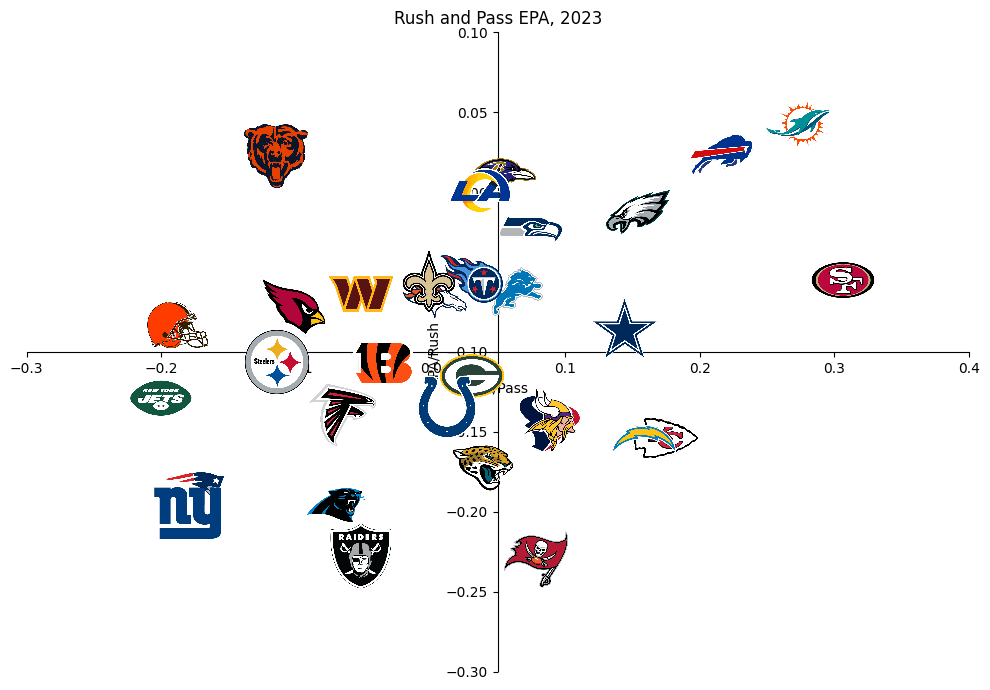

In [162]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True

# Load image into chart
def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

x = epa_with_logos['pass_epa']
y = epa_with_logos['rush_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

# Add points using logo
for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xlim(-0.3, 0.4)
plt.ylim(-0.3, 0.10)
plt.title("Rush and Pass EPA, 2023")
plt.xlabel("EPA/Pass")
plt.ylabel("EPA/Rush")
plt.show()

In [163]:
df = nfl.import_ngs_data(stat_type='passing')

In [164]:
df.columns

Index(['season', 'season_type', 'week', 'player_display_name',
       'player_position', 'team_abbr', 'avg_time_to_throw',
       'avg_completed_air_yards', 'avg_intended_air_yards',
       'avg_air_yards_differential', 'aggressiveness',
       'max_completed_air_distance', 'avg_air_yards_to_sticks', 'attempts',
       'pass_yards', 'pass_touchdowns', 'interceptions', 'passer_rating',
       'completions', 'completion_percentage',
       'expected_completion_percentage',
       'completion_percentage_above_expectation', 'avg_air_distance',
       'max_air_distance', 'player_gsis_id', 'player_first_name',
       'player_last_name', 'player_jersey_number', 'player_short_name'],
      dtype='object')

In [165]:
# Filter down to week = 0, full season data for the year(s) specified
df = df[df['week'] == 0]
df = df[df['season'] == year]
df = df.reset_index()
df

,index,season,season_type,week,player_display_name,player_position,team_abbr,avg_time_to_throw,avg_completed_air_yards,avg_intended_air_yards,...,completion_percentage,expected_completion_percentage,completion_percentage_above_expectation,avg_air_distance,max_air_distance,player_gsis_id,player_first_name,player_last_name,player_jersey_number,player_short_name
0,4094,2023,REG,0,Dak Prescott,QB,DAL,2.615213,5.267389,7.209491,...,71.040724,66.875050,4.165674,19.813682,62.445780,00-0033077,Rayne,Prescott,4,D.Prescott
1,4095,2023,REG,0,Will Levis,QB,TEN,2.874731,6.465610,10.843175,...,60.294118,58.298266,1.995852,24.884821,56.103649,00-0039152,Will,Levis,8,W.Levis
2,4096,2023,REG,0,Desmond Ridder,QB,ATL,2.599406,5.948854,7.760991,...,65.416667,66.015396,-0.598729,19.996567,58.870003,00-0038122,Desmond,Ridder,9,D.Ridder
3,4097,2023,REG,0,Tyson Bagent,QB,CHI,2.665412,3.800893,5.590000,...,70.000000,71.514679,-1.514679,20.855471,53.532914,00-0038416,Tyson,Bagent,17,T.Bagent
4,4098,2023,REG,0,Anthony Richardson,QB,IND,2.740095,5.334200,7.658642,...,59.523810,65.343596,-5.819786,20.609572,51.088524,00-0039164,Anthony,Richardson,5,A.Richardson
5,4099,2023,REG,0,Daniel Jones,QB,NYG,2.731172,4.240481,6.349236,...,68.874172,67.106301,1.767871,19.275451,53.366384,00-0035710,Daniel,Jones,8,D.Jones
6,4100,2023,REG,0,Tua Tagovailoa,QB,MIA,2.361048,6.382124,7.877068,...,70.437956,67.591906,2.846050,20.914475,53.078136,00-0036212,Tua,Tagovailoa,1,T.Tagovailoa
7,4101,2023,REG,0,Tyrod Taylor,QB,NYG,2.737224,5.433684,7.756154,...,65.517241,59.238552,6.278689,21.151116,60.100606,00-0028118,Tyrod,Taylor,2,T.Taylor
8,4102,2023,REG,0,Kenny Pickett,QB,PIT,2.876410,4.975035,7.370995,...,61.304348,60.978700,0.325647,21.514611,54.874927,00-0038102,Kenny,Pickett,8,K.Pickett
9,4103,2023,REG,0,Brock Purdy,QB,SF,2.662099,7.074379,8.261075,...,68.303571,67.068949,1.234623,20.689261,46.804962,00-0037834,Brock,Purdy,13,B.Purdy


In [166]:
# Calculate the average time to throw and completion % above expectation
average_ttt = df['avg_time_to_throw'].mean()
average_cpae = df['completion_percentage_above_expectation'].mean()

average_cpae

0.8991851093959351

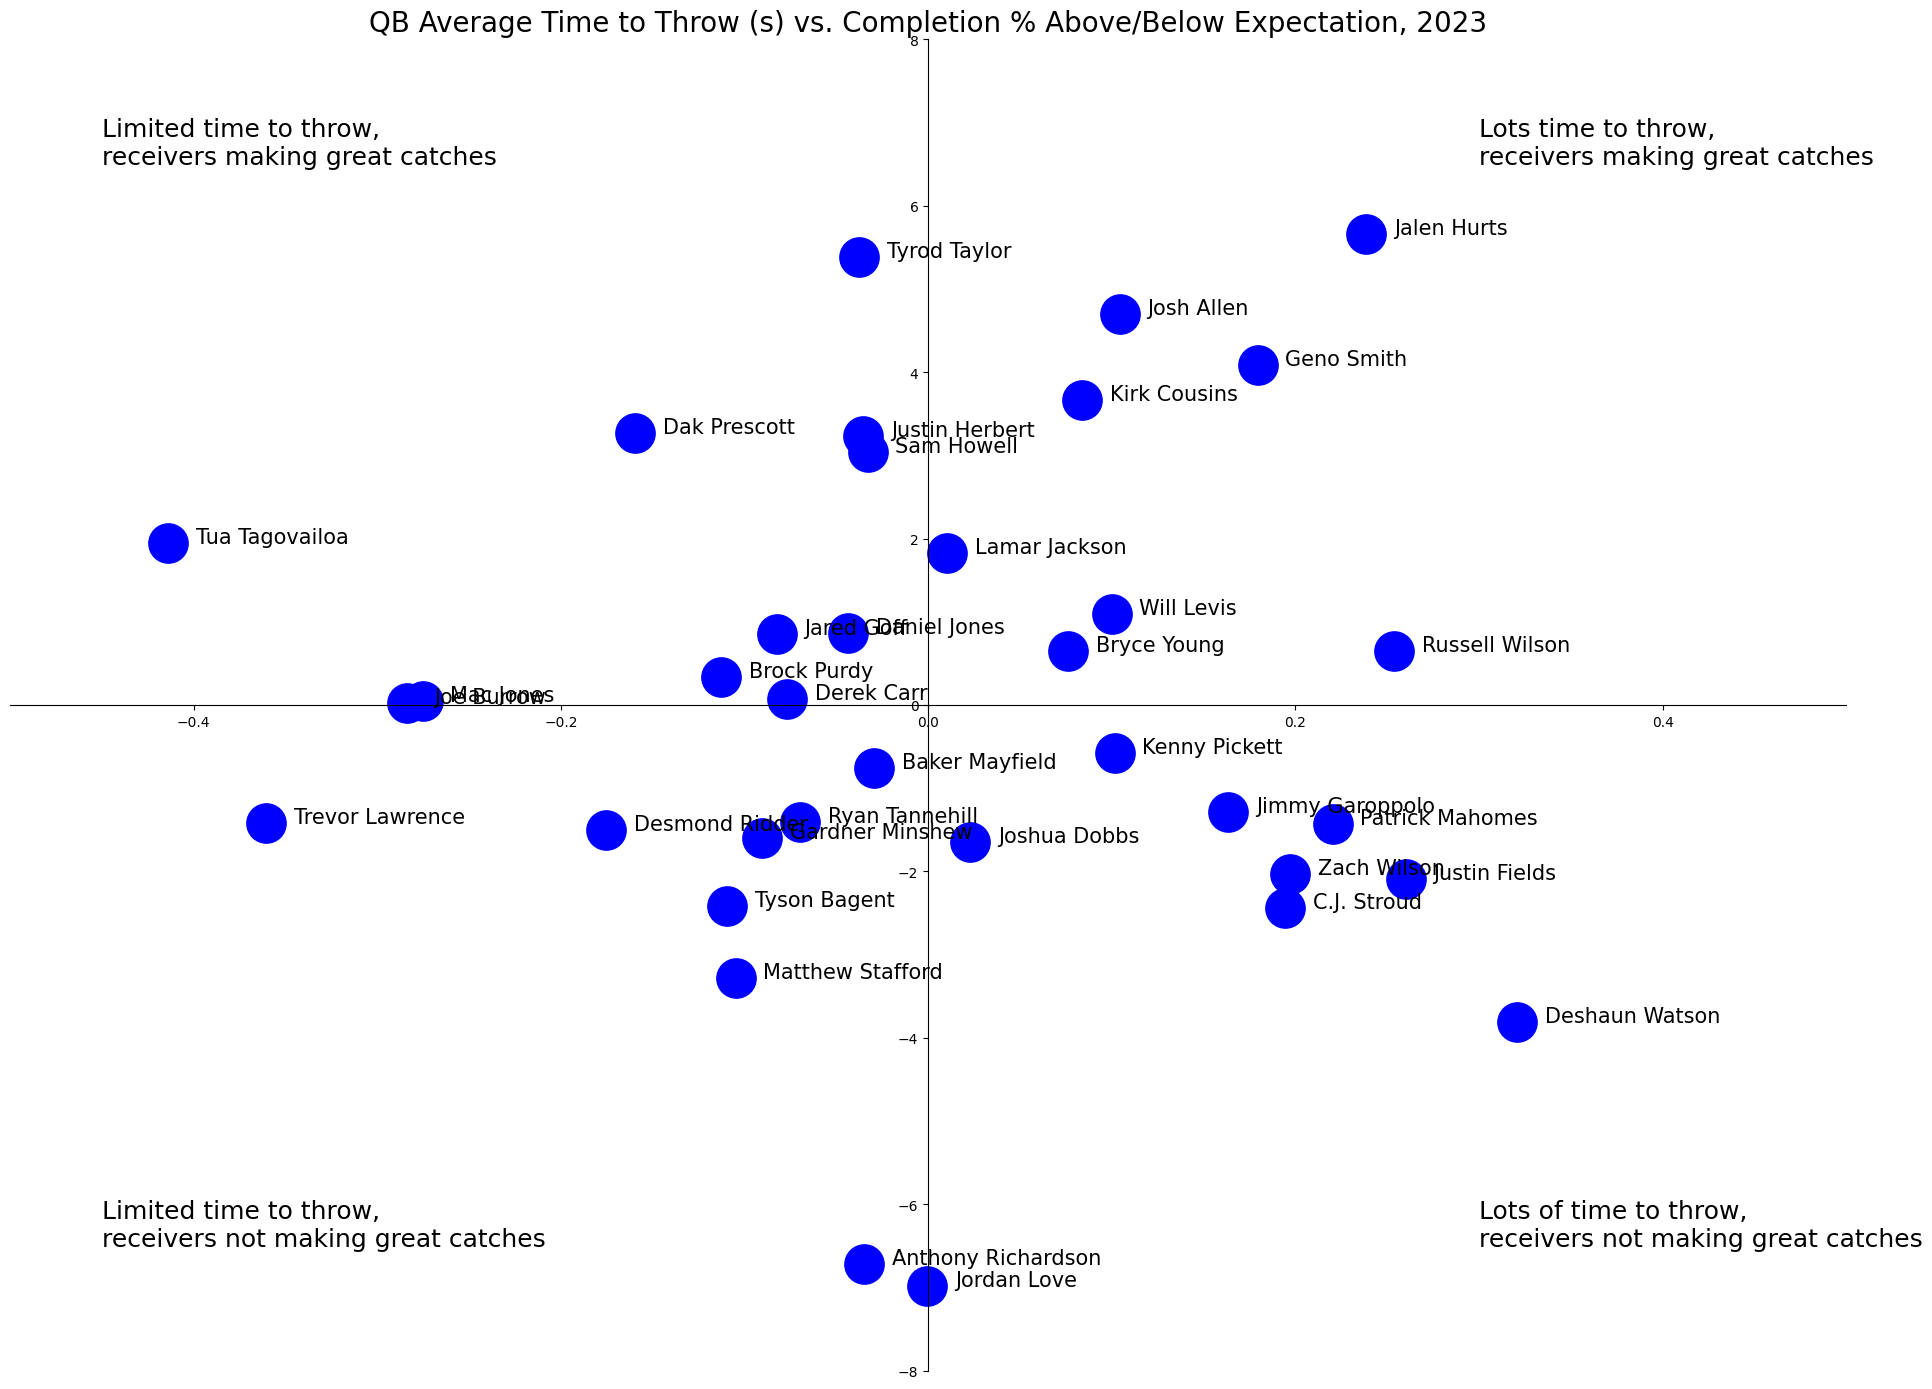

In [167]:
# Visualize the data

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [20, 14]
plt.rcParams["figure.autolayout"] = True


# Initialize empty lists for x,y 
x = []
y = []

# Define the x and y variables
for qb in df.index:
    x.append(df['avg_time_to_throw'][qb] - average_ttt)
    y.append(df['completion_percentage_above_expectation'][qb] - average_cpae)
    
# Put x,y into dictionary
xy = pd.DataFrame({'x' : x, 'y' : y})

# Define the plot
fig, ax = plt.subplots()

ax.scatter(xy['x'], xy['y'], s=800, c='blue')

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set x and y axis limits
plt.xlim((-0.5,0.5))
plt.ylim((-8,8))


# Annotate with QB name and year
for name in xy.index:
    plt.annotate(f"{df['player_display_name'][name]}",
                 (xy['x'][name] + 0.015,
                  xy['y'][name]),
                  fontsize=15)

# Annotate Quadrants
plt.annotate('Lots time to throw,\nreceivers making great catches', (0.3,6.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers making great catches', (-0.45,6.5), fontsize=18)
plt.annotate('Limited time to throw,\nreceivers not making great catches', (-0.45,-6.5), fontsize=18)
plt.annotate('Lots of time to throw,\nreceivers not making great catches', (0.3,-6.5), fontsize=18)
    

# Add a title
plt.title(f'QB Average Time to Throw (s) vs. Completion % Above/Below Expectation, 2023', fontsize=20)

    
# Style the chart
plt.show()

Sources: https://www.youtube.com/watch?v=auyOjPoURRg&ab_channel=MFANS, https://www.youtube.com/watch?v=wWgGgmqijNU&ab_channel=TimBryan
